<a href="https://colab.research.google.com/github/hager2164/tasks_follow/blob/main/Trees_reg_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Random forest & decision tree


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing, load_diabetes
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [ ]:
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")


In [ ]:
print("Loading California Housing Dataset...")
data = fetch_california_housing()
X, y = data.data, data.target
feature_names = data.feature_names

Loading California Housing Dataset...


In [ ]:
print("Loading California Housing Dataset...")
data = fetch_california_housing()
X, y = data.data, data.target
feature_names = data.feature_names

Loading California Housing Dataset...


In [ ]:
df = pd.DataFrame(X, columns=feature_names)
df['target'] = y


print(f"Dataset shape: {df.shape}")
print(f"Features: {list(feature_names)}")
print(f"Target: House values in hundreds of thousands of dollars")

print("\nDataset Info:")
print(df.describe().round(3))

print(f"\nMissing values: {df.isnull().sum().sum()}")


Dataset shape: (20640, 9)
Features: ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
Target: House values in hundreds of thousands of dollars

Dataset Info:
          MedInc   HouseAge   AveRooms  AveBedrms  Population   AveOccup  \
count  20640.000  20640.000  20640.000  20640.000   20640.000  20640.000   
mean       3.871     28.639      5.429      1.097    1425.477      3.071   
std        1.900     12.586      2.474      0.474    1132.462     10.386   
min        0.500      1.000      0.846      0.333       3.000      0.692   
25%        2.563     18.000      4.441      1.006     787.000      2.430   
50%        3.535     29.000      5.229      1.049    1166.000      2.818   
75%        4.743     37.000      6.052      1.100    1725.000      3.282   
max       15.000     52.000    141.909     34.067   35682.000   1243.333   

        Latitude  Longitude     target  
count  20640.000  20640.000  20640.000  
mean      35.632   -119.57

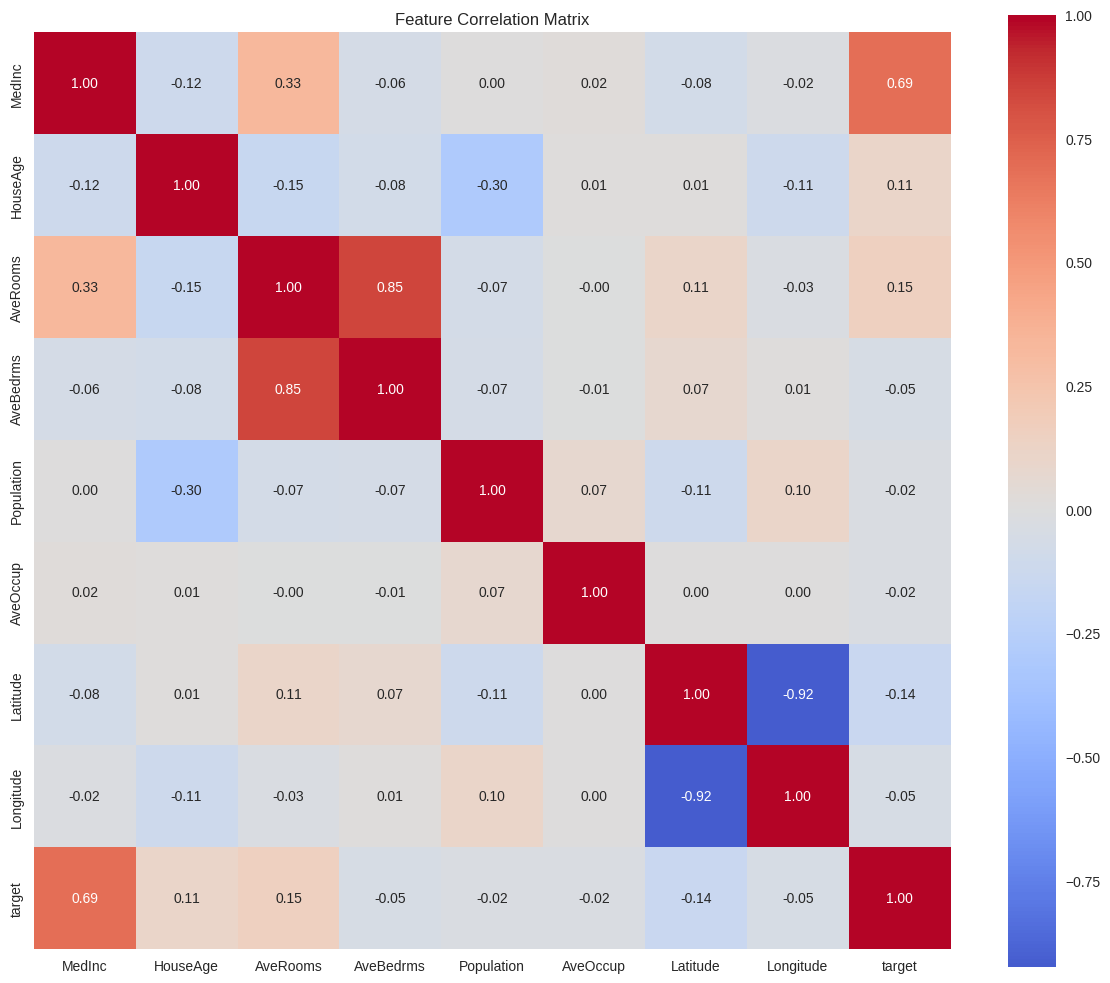

In [ ]:
plt.figure(figsize=(12, 10))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, fmt='.2f')
plt.title('Feature Correlation Matrix')
plt.tight_layout()
plt.show()



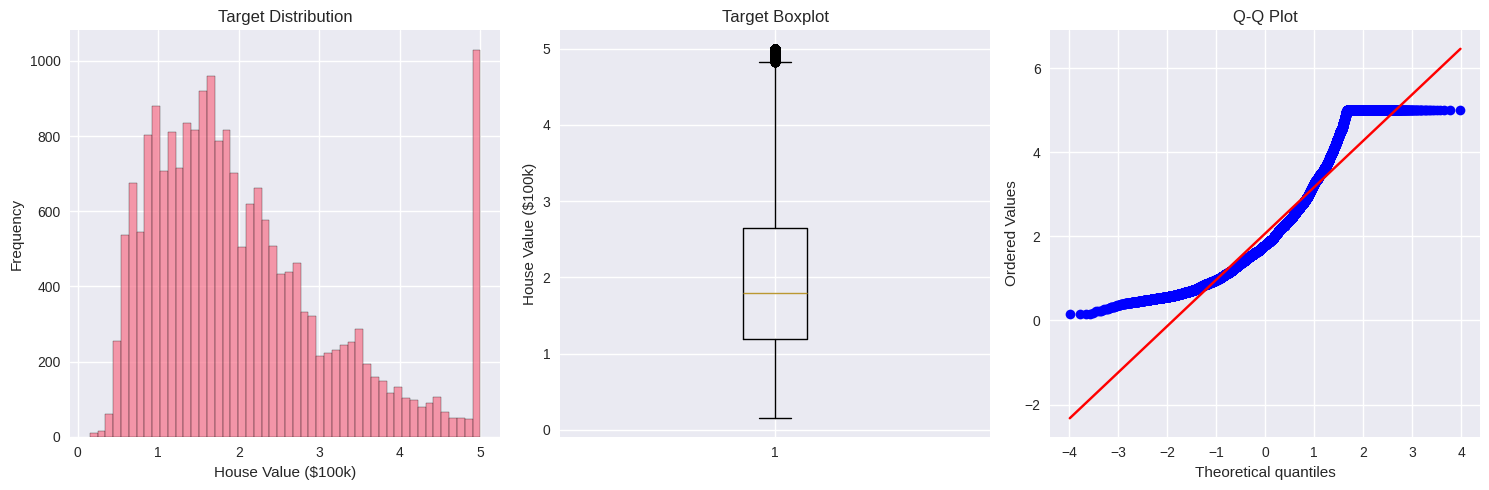

In [ ]:
# Distribution of target variable
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.hist(y, bins=50, edgecolor='black', alpha=0.7)
plt.title('Target Distribution')
plt.xlabel('House Value ($100k)')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
plt.boxplot(y)
plt.title('Target Boxplot')
plt.ylabel('House Value ($100k)')

plt.subplot(1, 3, 3)
from scipy import stats
stats.probplot(y, dist="norm", plot=plt)
plt.title('Q-Q Plot')

plt.tight_layout()
plt.show()

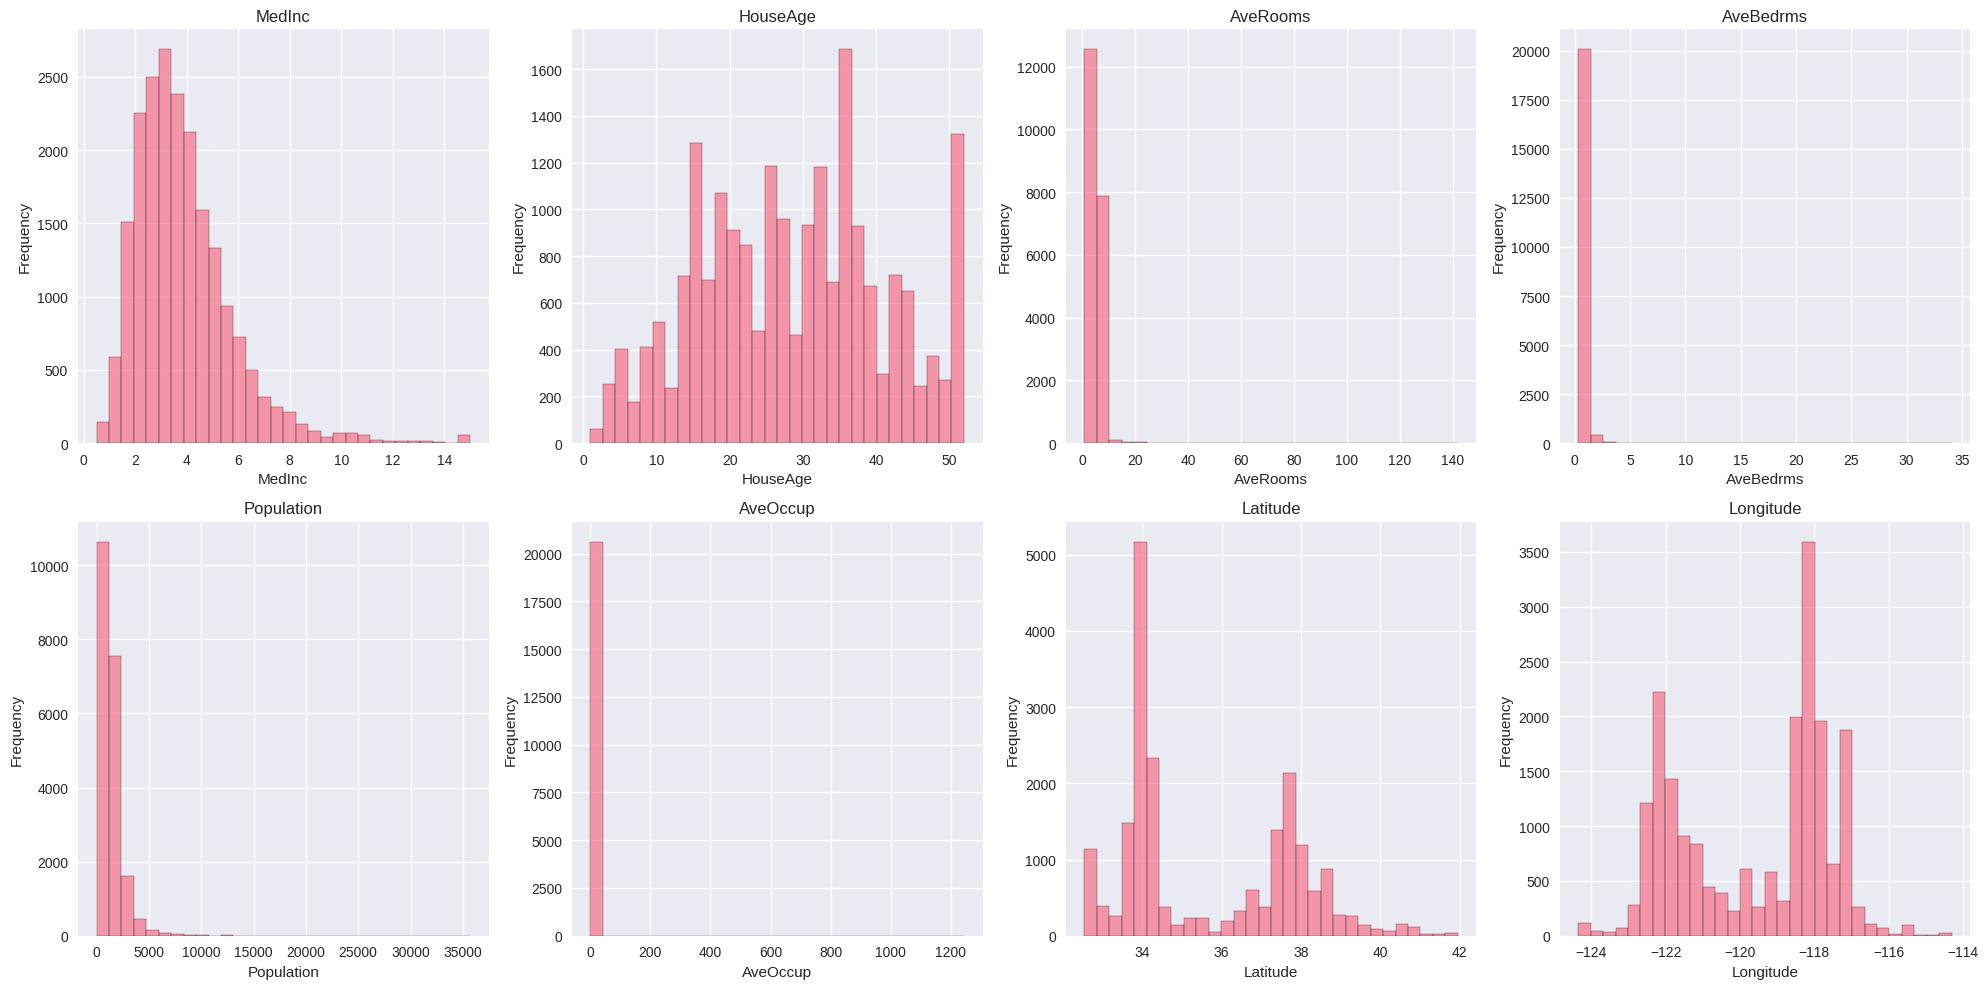

In [ ]:
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.flatten()

for i, feature in enumerate(feature_names):
    axes[i].hist(df[feature], bins=30, edgecolor='black', alpha=0.7)
    axes[i].set_title(f'{feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [ ]:
sample_size = 10000  # Use full dataset if you have time
if len(df) > sample_size:
    df_sample = df.sample(n=sample_size, random_state=42)
    print(f"Using sample of {sample_size} observations for faster processing")
else:
    df_sample = df.copy()

X_sample = df_sample.drop('target', axis=1).values
y_sample = df_sample['target'].values

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X_sample, y_sample, test_size=0.2, random_state=42
)

print(f"Training set size: {X_train.shape}")
print(f"Test set size: {X_test.shape}")



Using sample of 10000 observations for faster processing
Training set size: (8000, 8)
Test set size: (2000, 8)


In [ ]:
models = {

    'Decision Tree': DecisionTreeRegressor(random_state=42, max_depth=10),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
}

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:

results = {}
model_objects = {}

In [ ]:
for name, model in models.items():
    print(f"Training {name}...")

    X_train_use = X_train
    X_test_use = X_test

    model.fit(X_train_use, y_train)
    y_pred = model.predict(X_test_use)

    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    cv_scores = cross_val_score(model, X_train_use, y_train, cv=5, scoring='r2')


    results[name] = {
        'MSE': mse,
        'RMSE': rmse,
        'MAE': mae,
        'R2': r2,
        'CV_R2_mean': cv_scores.mean(),
        'CV_R2_std': cv_scores.std(),
        'predictions': y_pred
    }

    model_objects[name] = model

    print(f"  R² Score: {r2:.4f}")
    print(f"  RMSE: {rmse:.4f}")
    print(f"  CV R² (mean ± std): {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")

Training Decision Tree...
  R² Score: 0.6669
  RMSE: 0.6812
  CV R² (mean ± std): 0.6440 ± 0.0268
Training Random Forest...
  R² Score: 0.7958
  RMSE: 0.5334
  CV R² (mean ± std): 0.7841 ± 0.0140


In [ ]:
comparison_df = pd.DataFrame(results).T
comparison_df = comparison_df[['R2', 'RMSE', 'MAE', 'MSE', 'CV_R2_mean', 'CV_R2_std']]
print("Model Comparison:")
print(comparison_df.round(4))

Model Comparison:
                     R2      RMSE       MAE       MSE CV_R2_mean CV_R2_std
Random Forest  0.795793  0.533411  0.353343  0.284527   0.784071  0.014036
Decision Tree  0.666933  0.681228  0.443361  0.464072    0.64402  0.026849


Actual vs Predicted plots

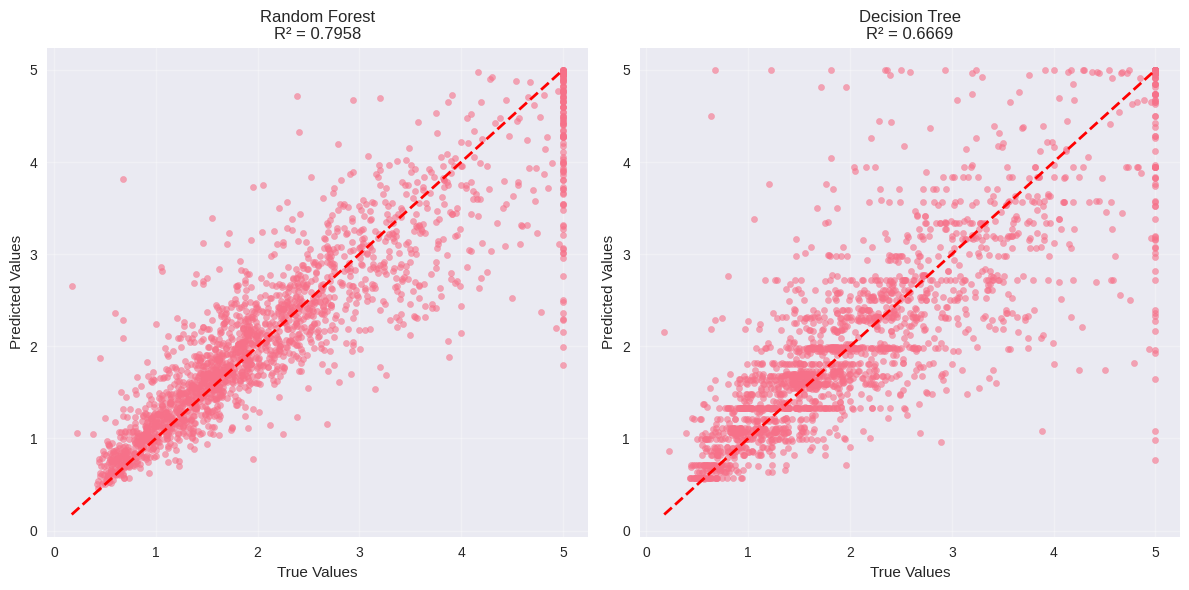

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
for i, (name, result) in enumerate(results.items()):
    ax = axes[i]
    y_pred = result['predictions']

    ax.scatter(y_test, y_pred, alpha=0.6, s=20)

    min_val = min(y_test.min(), y_pred.min())
    max_val = max(y_test.max(), y_pred.max())
    ax.plot([min_val, max_val], [min_val, max_val], 'r--', lw=2)

    ax.set_xlabel('True Values')
    ax.set_ylabel('Predicted Values')
    ax.set_title(f'{name}\nR² = {result["R2"]:.4f}')
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

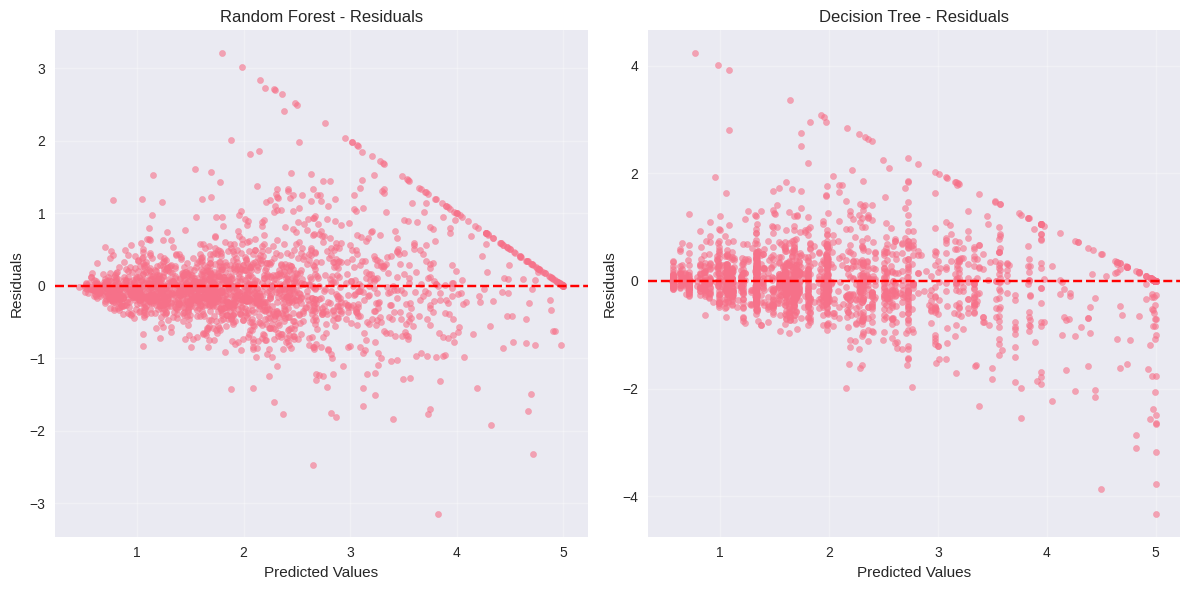

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6)) # Changed to 1 row, 2 columns for two plots



for i, (name, result) in enumerate(results.items()): # Iterate through all results
    ax = axes[i] # Use index i to select the correct subplot
    y_pred = result['predictions']
    residuals = y_test - y_pred

    ax.scatter(y_pred, residuals, alpha=0.6, s=20)
    ax.axhline(y=0, color='r', linestyle='--')
    ax.set_xlabel('Predicted Values')
    ax.set_ylabel('Residuals')
    ax.set_title(f'{name} - Residuals')
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

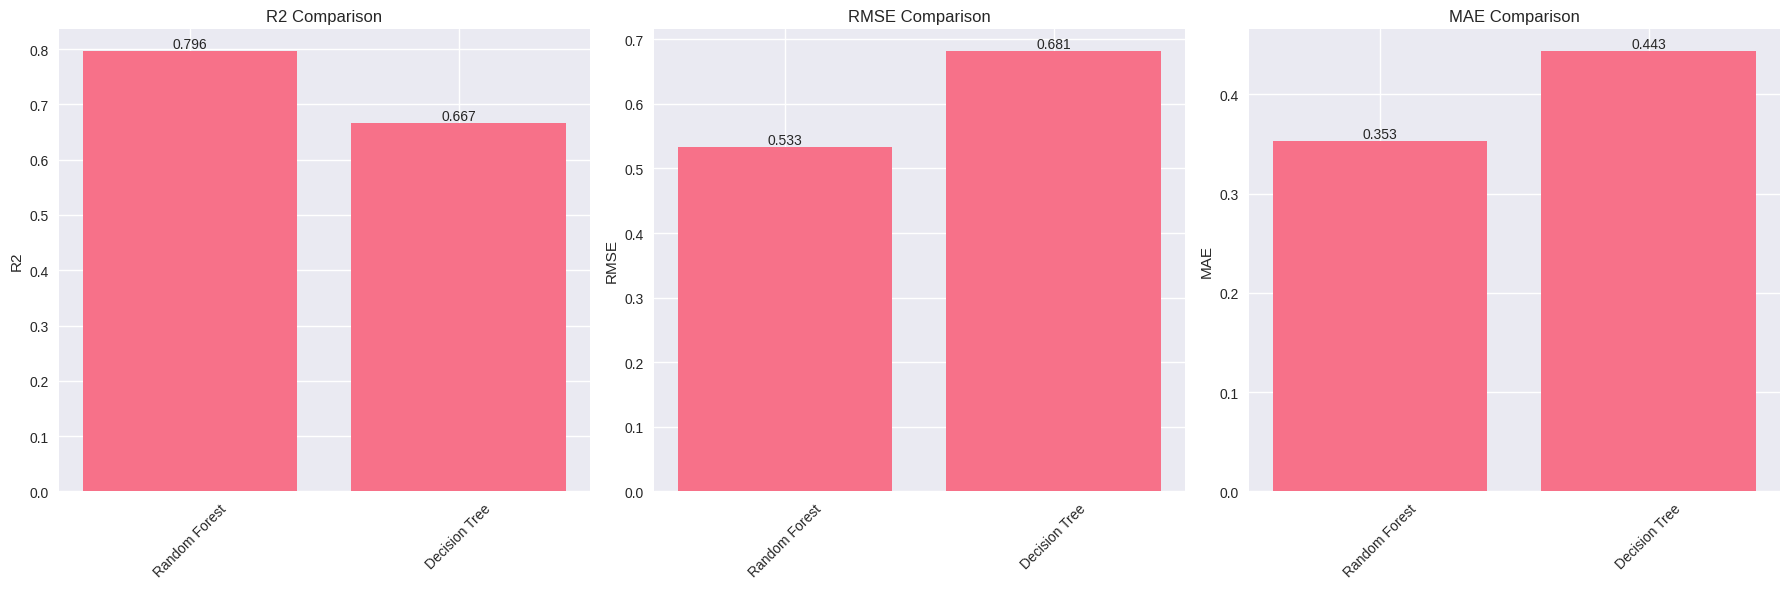

In [ ]:
metrics = ['R2', 'RMSE', 'MAE']
fig, axes = plt.subplots(1, 3, figsize=(18, 6))


for i, metric in enumerate(metrics):
    ax = axes[i]
    #  values of  both models
    dt_value = results['Decision Tree'][metric] if 'Decision Tree' in results else 0
    rf_value = results['Random Forest'][metric] if 'Random Forest' in results else 0
    values = [rf_value, dt_value]
    bars = ax.bar(['Random Forest', 'Decision Tree'], values)
    ax.set_title(f'{metric} Comparison')
    ax.set_ylabel(metric)
    ax.tick_params(axis='x', rotation=45)

    for bar, value in zip(bars, values):
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{value:.3f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

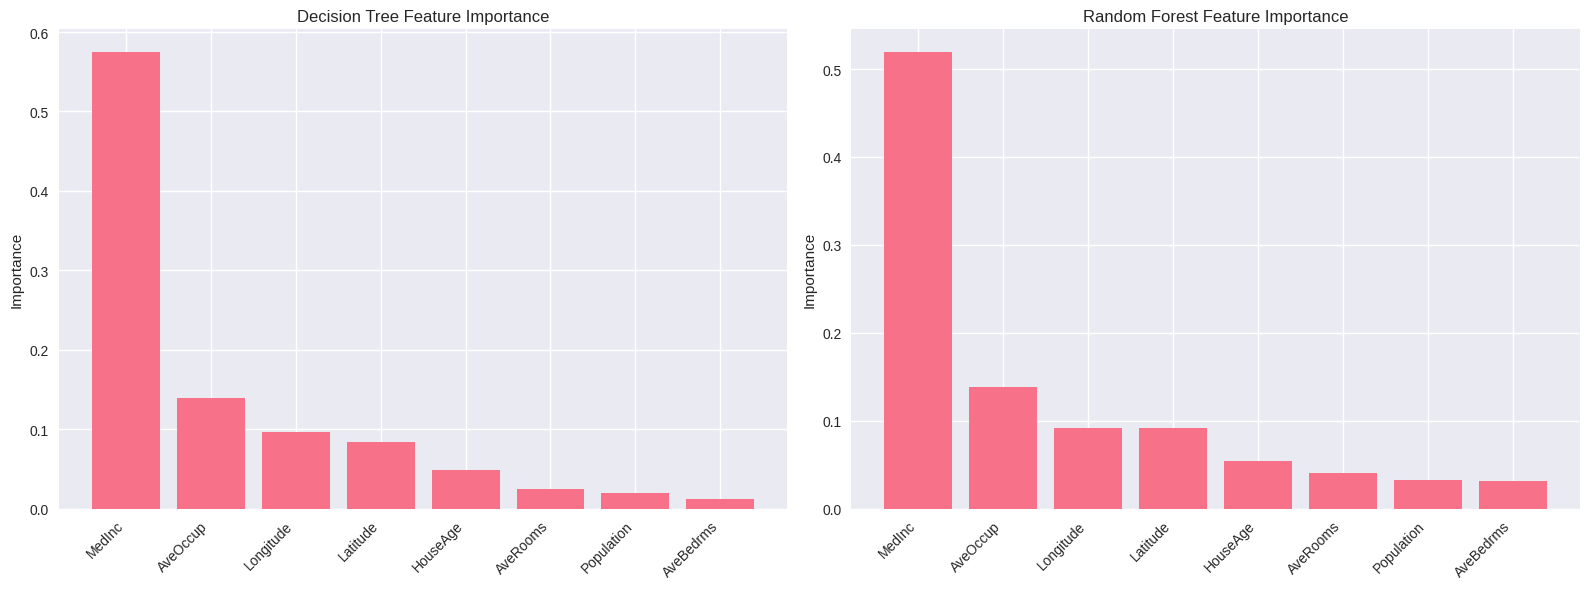

In [ ]:
tree_models = ['Decision Tree', 'Random Forest']
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

for i, model_name in enumerate(tree_models):
    if model_name in model_objects:
        model = model_objects[model_name]
        importance = model.feature_importances_

        indices = np.argsort(importance)[::-1]

        ax = axes[i]
        ax.bar(range(len(importance)), importance[indices])
        ax.set_xticks(range(len(importance)))
        ax.set_xticklabels([feature_names[j] for j in indices], rotation=45, ha='right')
        ax.set_title(f'{model_name} Feature Importance')
        ax.set_ylabel('Importance')

plt.tight_layout()
plt.show()

Hyperparameters for random forest

In [ ]:
print("Running hyperparameter tuning for Random Forest...")
print("This may take a few minutes...")

rf_params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

rf_grid = GridSearchCV(
    RandomForestRegressor(random_state=42),
    rf_params,
    cv=3,
    scoring='r2',
    n_jobs=-1,
    verbose=1
)


Running hyperparameter tuning for Random Forest...
This may take a few minutes...


In [ ]:
rf_grid.fit(X_train, y_train)

Fitting 3 folds for each of 27 candidates, totalling 81 fits


GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='r2', verbose=1)

In [ ]:
print(f"Best parameters: {rf_grid.best_params_}")
print(f"Best CV score: {rf_grid.best_score_:.4f}")


Best parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
Best CV score: 0.7789


In [ ]:
rf_tuned_pred = rf_grid.predict(X_test)
rf_tuned_r2 = r2_score(y_test, rf_tuned_pred)
print(f"Tuned Random Forest R²: {rf_tuned_r2:.4f}")
print(f"Improvement: {rf_tuned_r2 - results['Random Forest']['R2']:.4f}")


Tuned Random Forest R²: 0.7969
Improvement: 0.0011


In [ ]:
best_model = max(results.items(), key=lambda x: x[1]['R2'])
print(f"Best performing model: {best_model[0]} (R² = {best_model[1]['R2']:.4f})")


Best performing model: Random Forest (R² = 0.7958)


**Reasoning**:
Define the hyperparameter grid for the Decision Tree model as instructed.



In [ ]:
dt_params = {
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4, 8]
}

## Perform grid search

### Subtask:
Use `GridSearchCV` to search for the best combination of hyperparameters on the training data.


**Reasoning**:
Instantiate and fit the GridSearchCV object for the Decision Tree model.



In [ ]:
dt_grid = GridSearchCV(
    DecisionTreeRegressor(random_state=42),
    dt_params,
    cv=3,
    scoring='r2',
    n_jobs=-1,
    verbose=1
)

print("Running hyperparameter tuning for Decision Tree...")
print("This may take a few minutes...")

dt_grid.fit(X_train, y_train)

Running hyperparameter tuning for Decision Tree...
This may take a few minutes...
Fitting 3 folds for each of 80 candidates, totalling 240 fits


GridSearchCV(cv=3, estimator=DecisionTreeRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 5, 10, 15, 20],
                         'min_samples_leaf': [1, 2, 4, 8],
                         'min_samples_split': [2, 5, 10, 20]},
             scoring='r2', verbose=1)

**Reasoning**:
The hyperparameter tuning for the Decision Tree model is complete. Print the best parameters and the best cross-validation score found by GridSearchCV.



In [ ]:
print(f"Best parameters: {dt_grid.best_params_}")
print(f"Best CV score: {dt_grid.best_score_:.4f}")

Best parameters: {'max_depth': 15, 'min_samples_leaf': 8, 'min_samples_split': 20}
Best CV score: 0.6843


In [ ]:
dt_tuned_pred = dt_grid.predict(X_test)
dt_tuned_r2 = r2_score(y_test, dt_tuned_pred)
print(f"Tuned Decision Tree R²: {dt_tuned_r2:.4f}")

Tuned Decision Tree R²: 0.7052


eval


In [ ]:
dt_tuned_pred = dt_grid.best_estimator_.predict(X_test)


dt_tuned_mse = mean_squared_error(y_test, dt_tuned_pred)
dt_tuned_rmse = np.sqrt(dt_tuned_mse)
dt_tuned_mae = mean_absolute_error(y_test, dt_tuned_pred)
dt_tuned_r2 = r2_score(y_test, dt_tuned_pred)

print("Tuned Decision Tree Model Evaluation:")
print(f"  R² Score: {dt_tuned_r2:.4f}")
print(f"  RMSE: {dt_tuned_rmse:.4f}")
print(f"  MAE: {dt_tuned_mae:.4f}")
print(f"  MSE: {dt_tuned_mse:.4f}")


Tuned Decision Tree Model Evaluation:
  R² Score: 0.7052
  RMSE: 0.6409
  MAE: 0.4299
  MSE: 0.4108


In [ ]:
# compare
initial_dt_r2 = results['Decision Tree']['R2']
print(f"\nInitial Decision Tree R²: {initial_dt_r2:.4f}")
print(f"Improvement in R²: {dt_tuned_r2 - initial_dt_r2:.4f}")


Initial Decision Tree R²: 0.6669
Improvement in R²: 0.0382
